# Part 1. Clustering

To be more faimiliar with Unsupervised Learning approach, at the beginning we'll work on one of the simplest problem that you can find. It's clustering algorithm named "K-Means". Refer to the lecture part if you would like to learn more about it.

In this notebook, we'll apply this method to the most popular dataset - Iris. Iris contains 150 examples of 3 different species of flowers. Each of available examples is described using 4 features: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`. We will model these species using K-Means algorithm and try to predict new examples easily.

![Iris](assets/iris_dataset.png)

## 1. Import everything we need

Let's import all libraries that we will use in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

## 2. Look into the dataset

Now, let's load the dataset and check what it contains.

To load the dataset from CSV file, we can use **Pandas** library which is very useful when we want to read values from the hard drive. It also supports basic operations that simplifies data analysis. Now, let's use `read_csv` function to load our dataframe from file. Then, please check how our data looks like using `head()` method.

In [2]:
DATASET_PATH = './datasets/iris.csv'
flowers = pd.read_csv(DATASET_PATH)
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can check the size of our dataset using `shape` property.

In [3]:
flowers.shape

(150, 5)

Now, let's fetch all unique species in the dataset. To do so, you can refer to a given column (or columns) and use `values` property to get them in the array form. On such a list, you can apply `set` function and get distinct values.

In [4]:
set(flowers['species'].values)

{'setosa', 'versicolor', 'virginica'}

Pandas DataFrames allow to check some basic statistics about our data. Just call `describe()` method on your dataset.

In [5]:
flowers.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3. Visualization

Each time you play with new dataset, try to visualize it to understand it better. Sometimes it's easy, sometimes it's hard. As we just start our journey, it should be rather easy :)

During data visualization process, it's useful to assign colors to available species. Let's do it now!

In [6]:
COLOR_FOR_SPECIES = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
class_colors = [COLOR_FOR_SPECIES.get(species) for species in flowers['species']]
print(class_colors)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Our dataset contains 4 features for each example. Let's try to visualize dependencies between each of them.

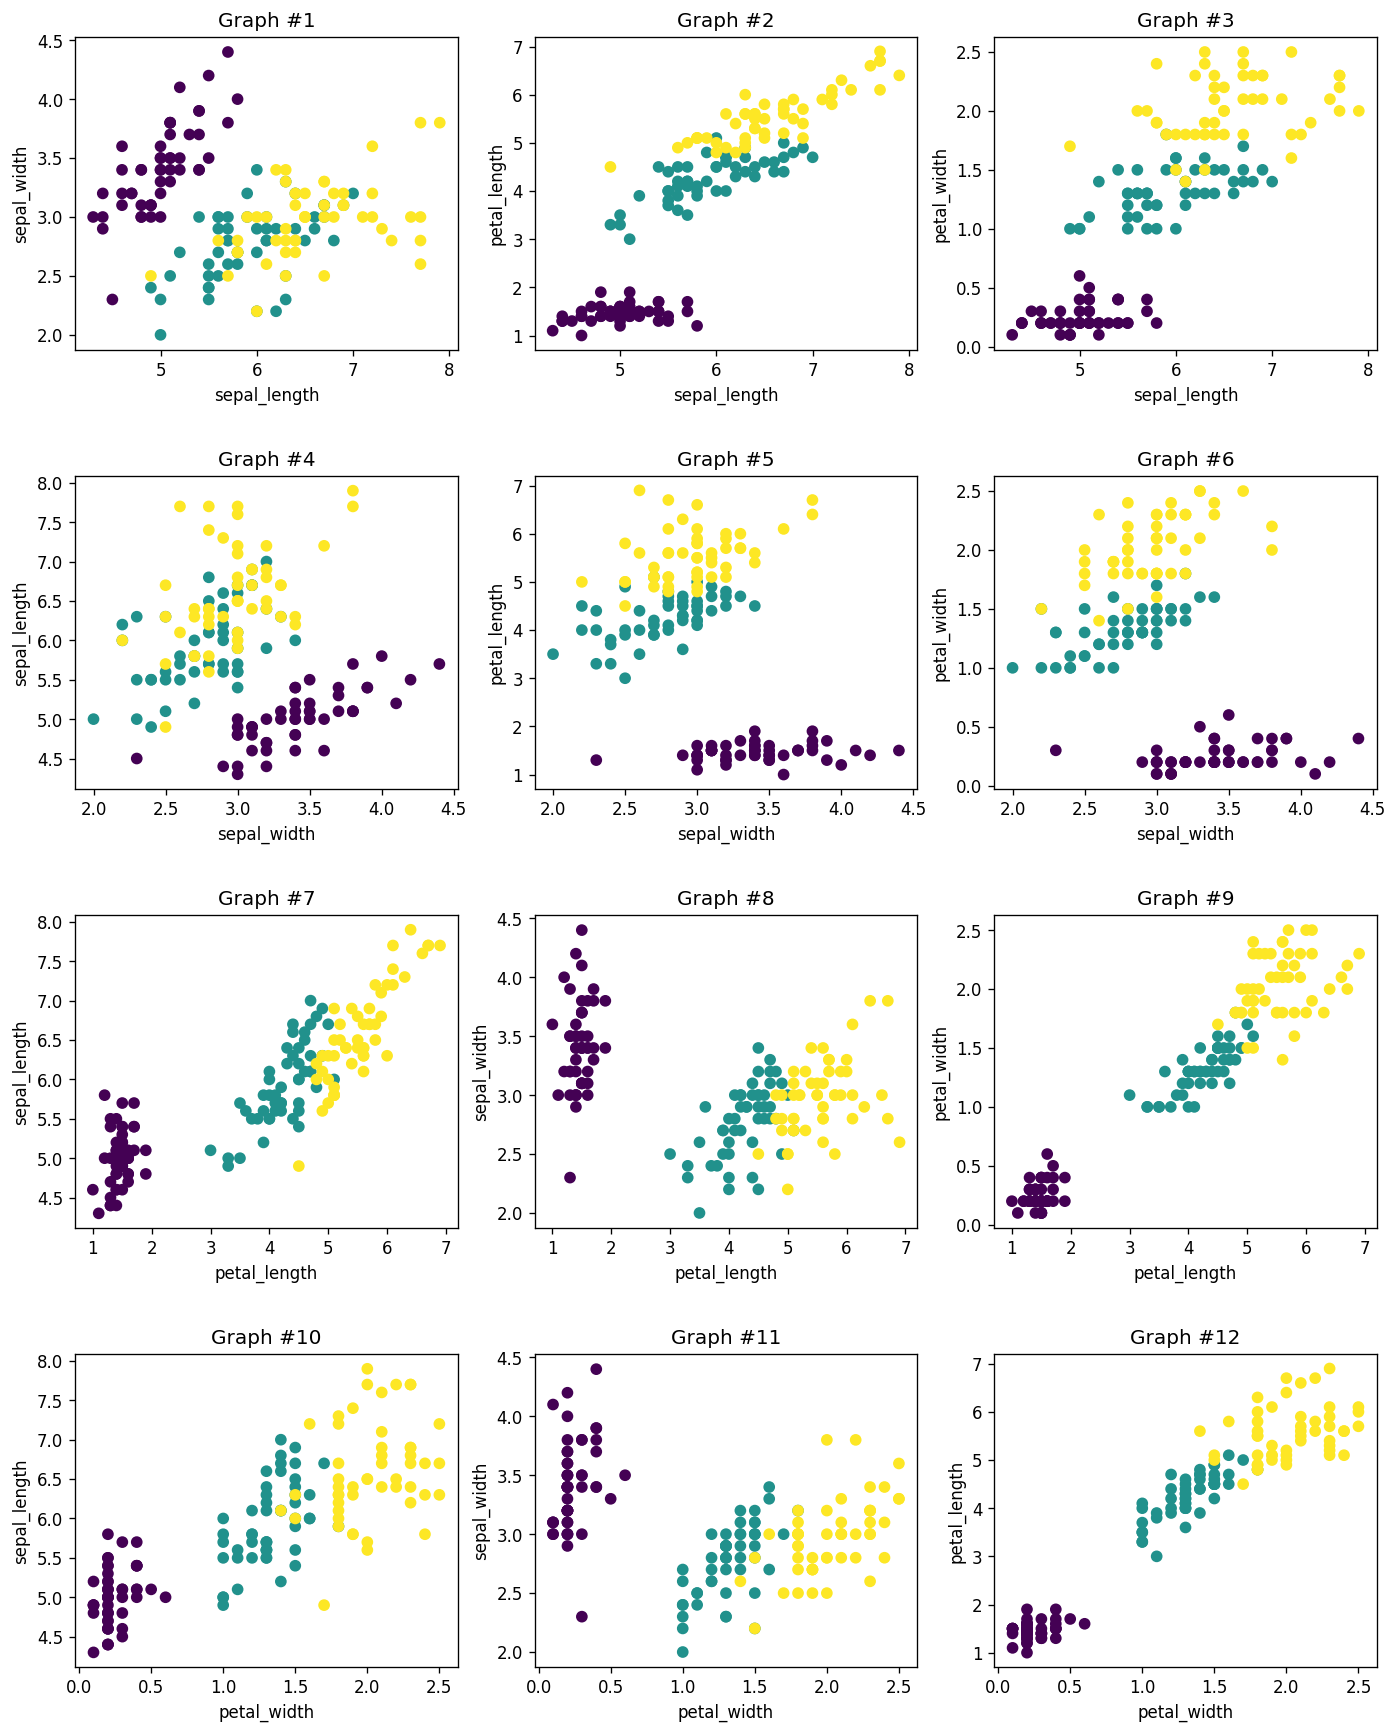

In [7]:
plt.figure(figsize=(14, 18), dpi=120)
grid = gridspec.GridSpec(4, 3, hspace=0.4)

i = 0
for first_feature in range(4):
    for second_feature in range(4):
        # It doesn't make sense to compare the same features
        if first_feature == second_feature:
            continue

        ax = plt.subplot(grid[i])
        X = flowers[flowers.columns[first_feature]].values
        Y = flowers[flowers.columns[second_feature]].values
        ax.set_xlabel(flowers.columns[first_feature])
        ax.set_ylabel(flowers.columns[second_feature])
        ax.set_title('Graph #{}'.format(i+1))
        ax.scatter(X, Y, c=class_colors)
        i += 1

plt.show()

## 4. Prepare dataset

Once we know what we've got in our dataset, let's prepare it for later use.

As you may assume, only these 4 features are useful during our analysis, so let's remove all other columns.

In [8]:
INTERESTING_FEATURES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
flowers = flowers[INTERESTING_FEATURES]
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 5. Finetune the model

Now, it's time for the main reason we're all here :) Let's prepare our model based on KMeans algorithm.

To do so, prepare an instance of `KMeans` class and set it to use 3 clusters.

In [9]:
model = KMeans(n_clusters=3)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

And tune its internal representation to our dataset using `fit()` method.

In [10]:
model.fit(flowers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Your model is now ready to be used to predict newly collected flower examples. Here, we will check how it performs on the data we've already have.

In [11]:
predicted_classes = model.predict(flowers)
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

And use the same visualization technique as before. This time, let's color our examples using `predicted_classes`.

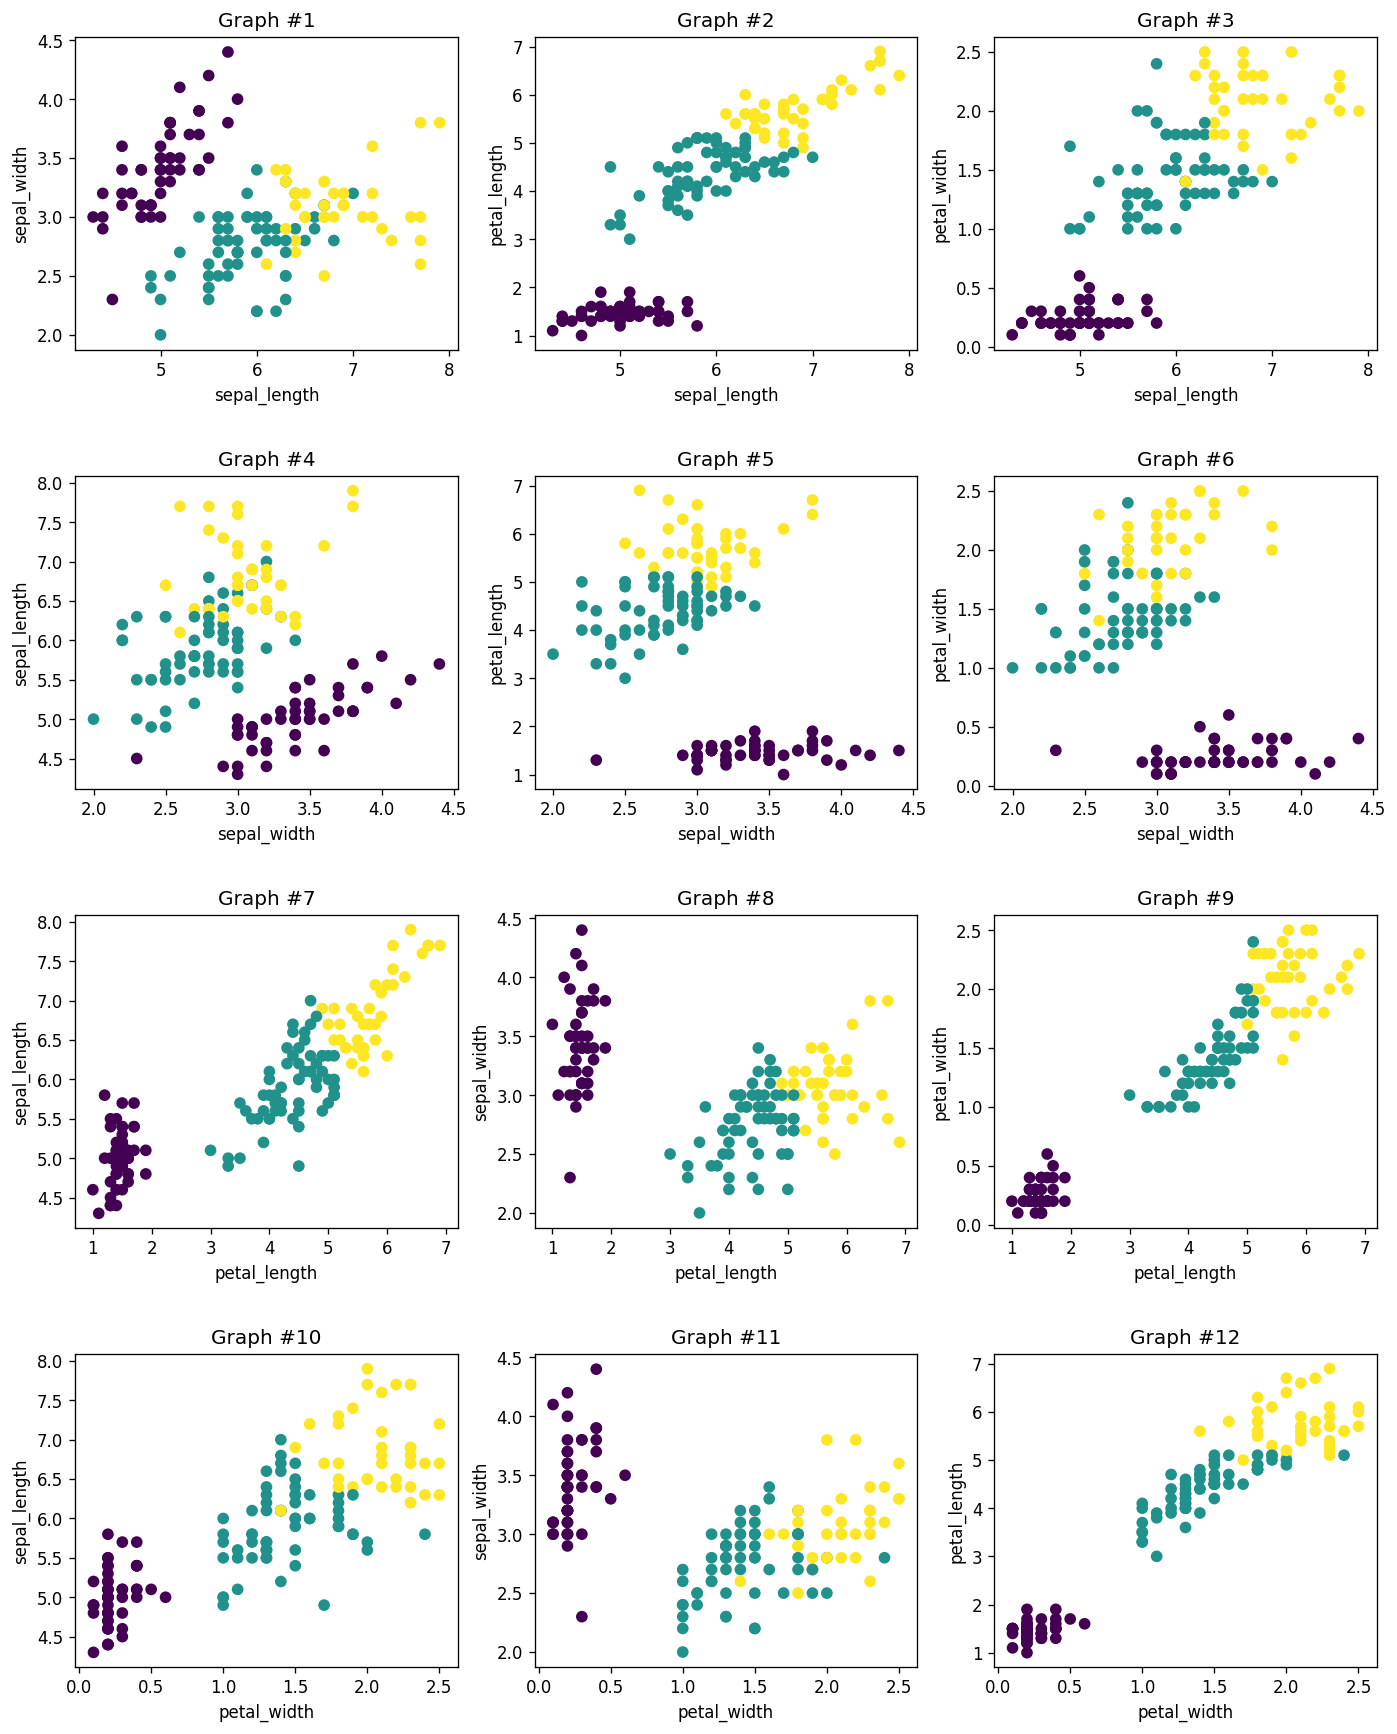

In [12]:
plt.figure(figsize=(14, 18), dpi=120)
grid = gridspec.GridSpec(4, 3, hspace=0.4)

i = 0
for first_feature in range(4):
    for second_feature in range(4):
        # It doesn't make sense to compare the same features
        if first_feature == second_feature:
            continue

        ax = plt.subplot(grid[i])
        X = flowers[flowers.columns[first_feature]].values
        Y = flowers[flowers.columns[second_feature]].values
        ax.set_xlabel(flowers.columns[first_feature])
        ax.set_ylabel(flowers.columns[second_feature])
        ax.set_title('Graph #{}'.format(i+1))
        ax.scatter(X, Y, c=predicted_classes)  # NOTE: Now we use Predicted Classes!
        i += 1

plt.show()

# 6. Evaluate our model

Number of clusters will impact model fitness to your dataset. The more clusters you use, the better score you'll get. However, it doesn't make any sense to use N clusters for N examples :)

That's why we need to evaluate our current model and check for possible better hyperparameters.

Current model's have `inertia_` property that tells us how well our clusters wrapped available dataset examples.

In [13]:
model.inertia_

78.94084142614602

The same value we can get by summing all distances between dataset examples. By default, Scikit Learn's implementation uses Euclidean distance.

In [14]:
sum_of_distances = 0
for flower in flowers.values:
    flower_class = model.predict([flower])[0]
    cluster_center = model.cluster_centers_[flower_class]
    distance = np.sum((cluster_center - flower) ** 2)
    sum_of_distances += distance
sum_of_distances

78.94084142614601

Now, let's apply "elbow" approach to find the best number of clusters for our dataset.

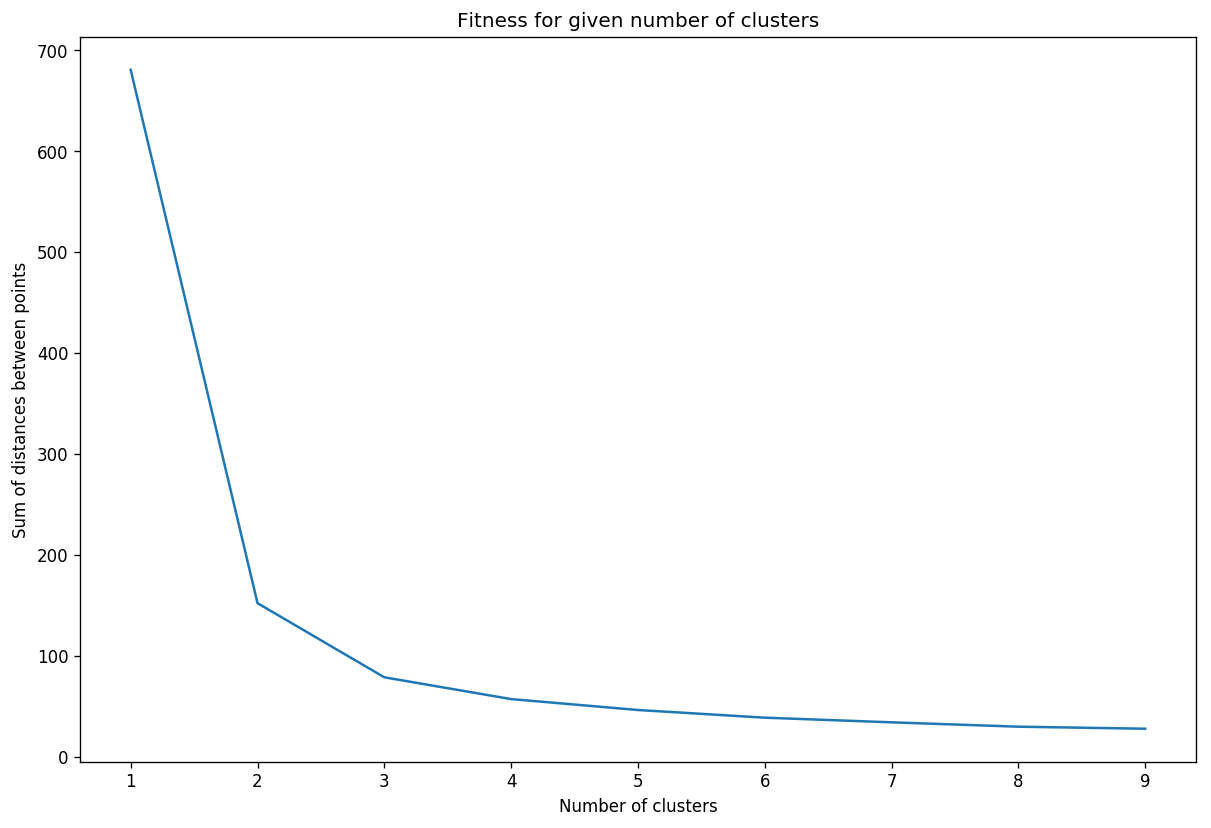

In [15]:
X = range(1, 10)
Y = []
for number_of_clusters in X:
    model = KMeans(n_clusters=number_of_clusters)
    model.fit(flowers)
    Y.append(model.inertia_)

plt.figure(figsize=(12,8), dpi=120)
plt.title('Fitness for given number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of distances between points')
plt.plot(X, Y)
plt.show()

**[BONUS]** You can always automate this manual check :)

In [16]:
model = KMeans(n_clusters=1)
model.fit(flowers)
previous_difference = model.inertia_
number_of_clusters = 1

for n_clusters in range(2, 10):
    model = KMeans(n_clusters=n_clusters)
    model.fit(flowers)
    current_difference = model.inertia_ - previous_difference
    if previous_difference < current_difference:
        number_of_clusters = n_clusters
        break
    previous_difference = current_difference
number_of_clusters

3